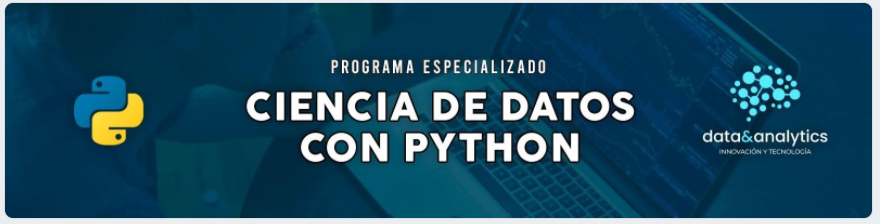

##**PROYECTO GRUPAL N°1**
###**INTEGRANTES**:
####CORONADO ANDREA
####LAURA LLOYD
####HUAMANI JORGE
####PALESTRO RELEXA


###*EXPLORACIÓN Y ANALISIS DE LA DATA*

In [100]:
#LEVANTAR LIBRERIAS
import pandas as pd
import numpy as np
import statistics as stats
import math as math
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore
# from google.colab import drive
# drive.mount('/content/drive/')
#!pip install statistics

In [101]:
#IMPORTAR DATOS
from google.colab import files
files.upload()

Saving Seguros.csv to Seguros (1).csv


{'Seguros.csv': b'Cliente_ID,Antig\xfcedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro\r\n185,44,1,604.86,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n238,79,1,1006.21,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n346,102,1,299.23,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n460,,1,645.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n549,109,,218,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n559,183,,10.32,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n666,172,0,3517.07,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n676,76,1,216.52,0,0,1,0,0,0,0,0,0,0,1,1,1,no\r\n696,136,0,1908.69,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n907,171,0,1895.19,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n974,93,1,1310.43,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1083,119,1,5085.55,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1186,9,,4871.7,0,0,0,0,0,1,0,0,0,0,0,0,0,no\r\n1196,17,1,193.4,0,0,0,0,0,0,0,0,0,0,0,0,0,no\r\n1454,122,1,83.34

In [ ]:
path = 'Seguros.csv'
df = pd.read_csv(path, sep=',', encoding= 'unicode_escape')
df.head()

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no


In [ ]:
#DIMENSION
df.shape

(5800, 18)

In [ ]:
#DESCRIPCION DE LAS VARIABLES NUMERICAS
df.describe()

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
count,5800.000000,5213.000000,5527.000000,5800.000000,5800.000000,5614.000000,5544.000000,5460.00000,5397.000000,5324.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.00000,5800.00000,5800.000000
mean,396733.357414,49.847113,1.071286,3240.983681,0.199310,0.243498,0.220238,0.19359,0.185473,0.172239,4970.516469,0.783793,0.696034,0.645862,0.59431,0.54569,0.504483
std,230285.889850,47.050525,1.158293,6157.722805,0.679003,0.891208,0.842461,0.78107,0.744306,0.707314,22016.410538,4.890399,4.746389,4.661810,4.57556,4.48461,4.401709
min,185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,195501.250000,12.000000,0.000000,329.747500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
50%,403865.000000,34.000000,1.000000,1100.315000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
75%,598317.750000,76.000000,1.000000,3265.322500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
max,790771.000000,255.000000,5.000000,124102.080000,6.000000,7.000000,7.000000,7.00000,7.000000,7.000000,442334.800000,289.000000,289.000000,289.000000,289.00000,289.00000,288.000000


Comentario: Se puede visualizar si es que hay datos faltantes en algunas variables como: Antiguedad_Maxima, puntaje_morosidad2, entre otros.

In [ ]:
#VERIFICANDO DATOS DUPLICADOS
df[df["Cliente_ID"].duplicated()].head()

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro


In [ ]:
#OBSERVAR LOS TIPOS DE LAS VARIABLES DE LA DATA 
df.dtypes

Cliente_ID               int64
Antigüedad_Maxima      float64
Nivel_Ingresos         float64
Saldo_Pendiente        float64
Puntaje_Morosidad1       int64
Puntaje_Morosidad2     float64
Puntaje_Morosidad3     float64
Puntaje_Morosidad4     float64
Puntaje_Morosidad5     float64
Puntaje_Morosidad6     float64
Saldo_Pendiente_Seg    float64
Siniestros1              int64
Siniestros2              int64
Siniestros3              int64
Siniestros4              int64
Siniestros5              int64
Siniestros6              int64
Estado_Siniestro        object
dtype: object

Comentario: La mayoria de nuestras variables son númericas y la variable objetivo que es "Estado_Siniestro" es de tipo object, es decir es categórica.

In [ ]:
#DIVISION DE LA DATA EN CUANTITATIVO Y CUALITATIVO
numerical_features = df.loc[:, ['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg']]

categorical_features = df.loc[:, ['Estado_Siniestro', 'Nivel_Ingresos']]

In [ ]:
numerical_features = numerical_features.astype('float64')
numerical_features.dtypes

Antigüedad_Maxima      float64
Saldo_Pendiente        float64
Saldo_Pendiente_Seg    float64
dtype: object

In [ ]:
#FUNCIÓN PARA VISUALIZAR EL HISTOGRAMA POR CADA VARIABLE NUMERICA
def desc_num_feature(numerical_features): 
  feature_name=numerical_features
  fig, ax = plt.subplots(figsize=(10,4))
  df[feature_name].hist(bins=30, edgecolor="b")
  ax.set_title(feature_name, size=25)
  df[feature_name].describe().round(2)  

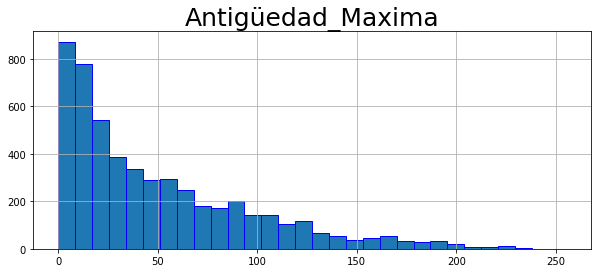

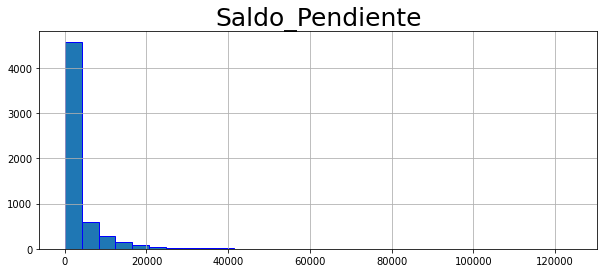

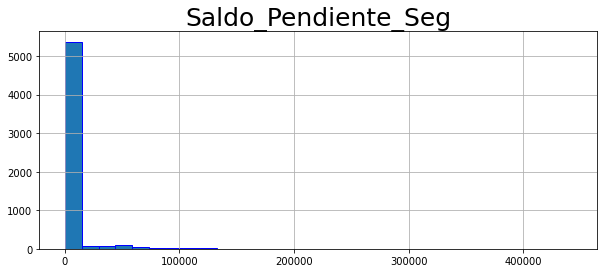

In [ ]:
for x in numerical_features:
  desc_num_feature(x)

Comentario: Se observa en los resultados que las variables no presentan una distribución normal y posiblemente presente outliers.

In [ ]:
#visualizar data categorica

def desc_cat_feature(categorical_features): #Función para visualizar el diagrama de barras por cada variable categorica
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.countplot(df[categorical_features], order=df[categorical_features].value_counts().index)  
  ax.set_title(categorical_features, size=25)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


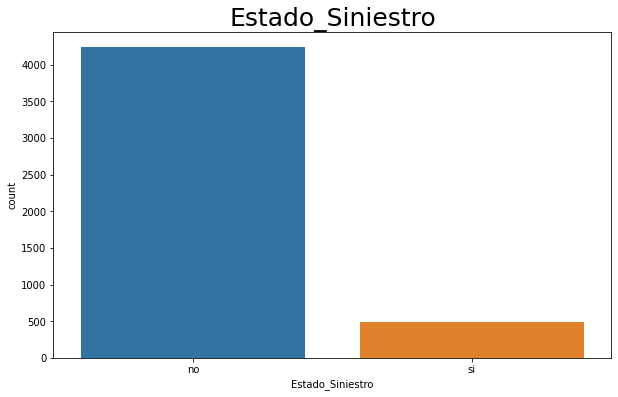

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


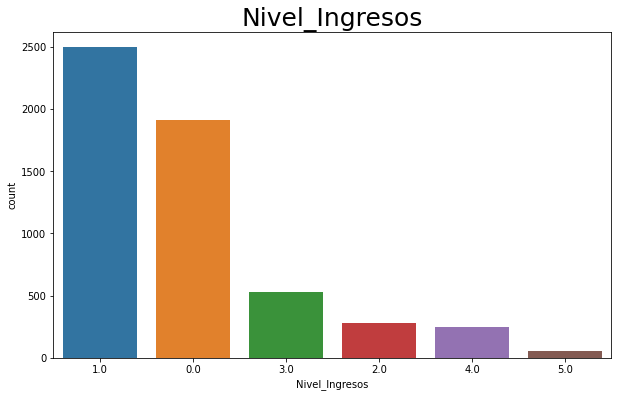

In [ ]:
for x in categorical_features:
  desc_cat_feature(x)

Comentario: En el resultado podriamos afirmar que nuestro target esta desbalanceado.

Tratamiento de Outliers

Medidas de dispersión:

In [ ]:
#TRATAMIENTO DE OUTLIERS
#MÉTODO RIC
#outliers
def grafico_numericos(numerical_features, data, x): # parámetros
  
  for i, numerical_features in enumerate(numerical_features): 
    fig, ax = plt.subplots(figsize=(6, 3.84))
    sns.boxplot(   # boxplot  violinplot
        x = x,  # eje X
        y = numerical_features,  # eje Y
        data  = df,
        )
    ax.set_title(numerical_features, fontsize = 10, fontweight = "bold")
    ax.tick_params(labelsize = 8)
    ax.set_xlabel("Estado_Siniestro") 

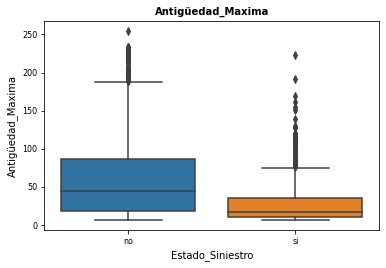

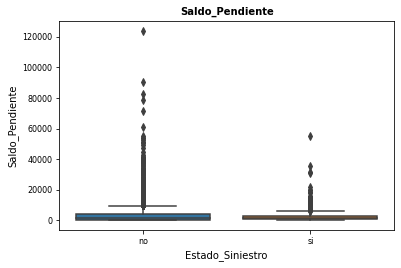

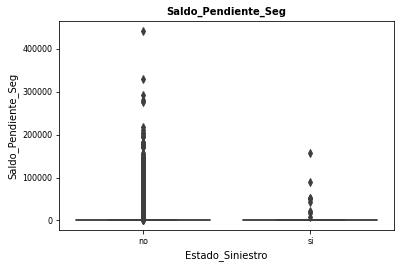

In [ ]:
x = df.Estado_Siniestro  # variable cualitativa

grafico_numericos(numerical_features,df,x)

Comentario: Afirmamos la presencia de ouliers en las variables númericas.

<Figure size 432x288 with 0 Axes>

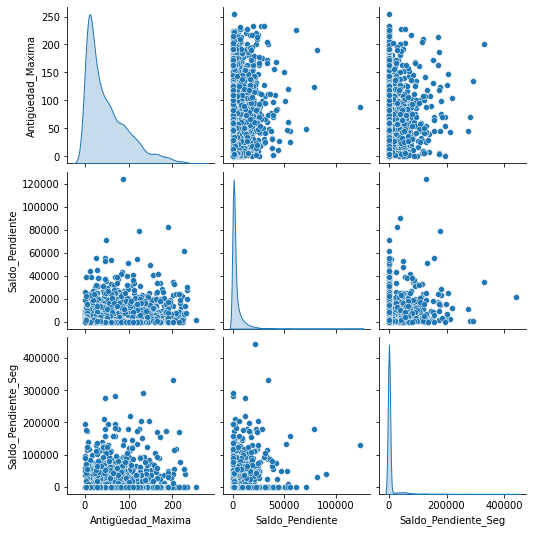

In [ ]:
#IDENTIFICAMOS LAS RELACIONES CON LAS VARIABLES NUMERICAS
plt.figure(figsize=(6,4))

sns.pairplot(numerical_features, diag_kind='kde');

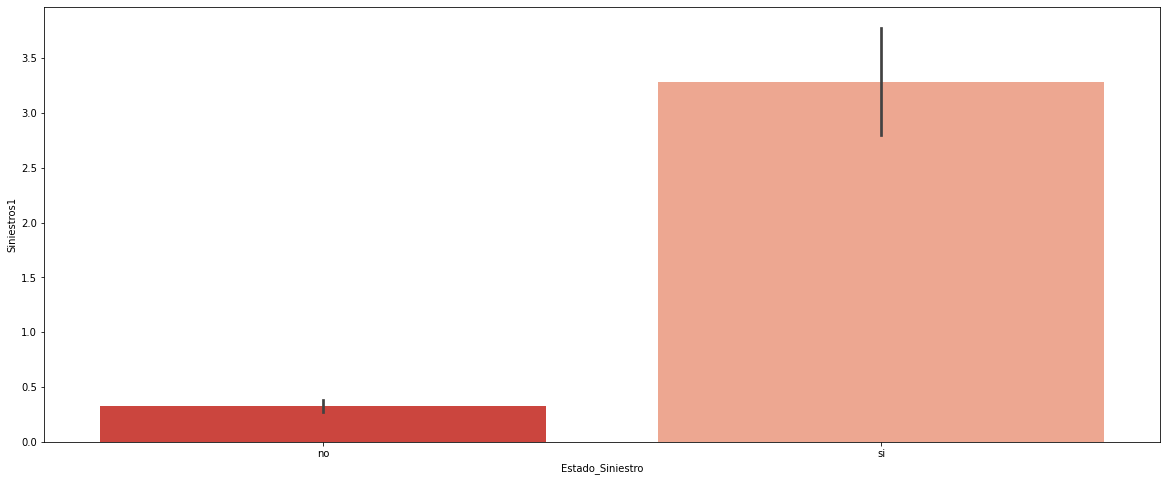

In [ ]:
#ANALISIS BIVARIADO
#Variables numericas con categoricas
f, ax = plt.subplots(1,1, figsize=(20,8))
ax = sns.barplot(x = 'Estado_Siniestro', y = 'Siniestros1',
                 data=df, palette='Reds_r') #, hue='Siniestros1')

Comentario: En el resultado podemos deducir a mayor Antiguedad_Maxima menor Saldo_Pendiente.

In [ ]:
#IMPUTACION
#Revisar las curtosis de las variables con valores nulos
df1 = df.copy()

In [ ]:
#VALORES MISSING
data_missing_value = df1.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Estado_Siniestro,1068,18.414
1,Antigüedad_Maxima,587,10.121
2,Puntaje_Morosidad6,476,8.207
3,Puntaje_Morosidad5,403,6.948
4,Puntaje_Morosidad4,340,5.862
5,Nivel_Ingresos,273,4.707
6,Puntaje_Morosidad3,256,4.414
7,Puntaje_Morosidad2,186,3.207


In [ ]:
#SUMA
df1.isnull().sum()

Cliente_ID                0
Antigüedad_Maxima       587
Nivel_Ingresos          273
Saldo_Pendiente           0
Puntaje_Morosidad1        0
Puntaje_Morosidad2      186
Puntaje_Morosidad3      256
Puntaje_Morosidad4      340
Puntaje_Morosidad5      403
Puntaje_Morosidad6      476
Saldo_Pendiente_Seg       0
Siniestros1               0
Siniestros2               0
Siniestros3               0
Siniestros4               0
Siniestros5               0
Siniestros6               0
Estado_Siniestro       1068
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


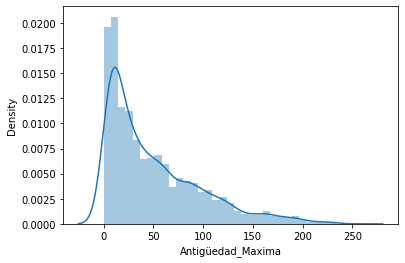

In [ ]:
#GRAFICOS
sns.distplot(df1['Antigüedad_Maxima'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


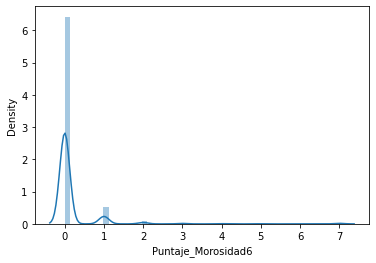

In [ ]:
sns.distplot(df1['Puntaje_Morosidad6'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


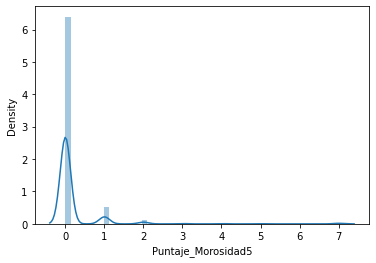

In [ ]:
sns.distplot(df1['Puntaje_Morosidad5'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


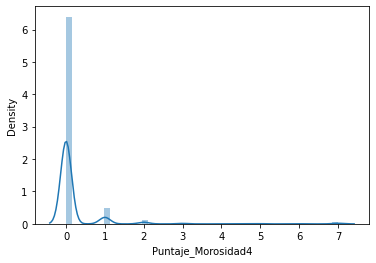

In [ ]:
sns.distplot(df1['Puntaje_Morosidad4'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


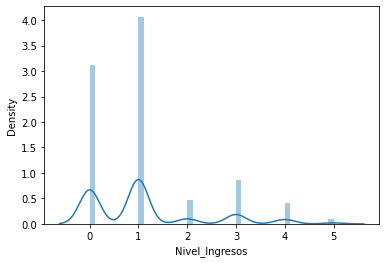

In [ ]:
sns.distplot(df1['Nivel_Ingresos'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


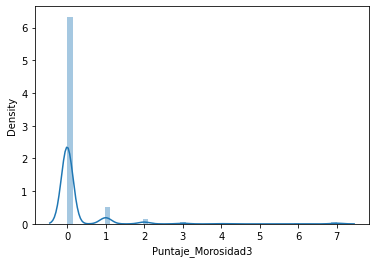

In [ ]:
sns.distplot(df1['Puntaje_Morosidad3'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


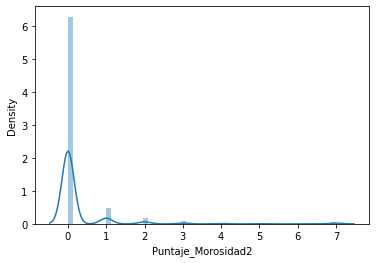

In [ ]:
sns.distplot(df1['Puntaje_Morosidad2'])

In [ ]:
#IMPUTANDO POR LA MEDIA O MEDIANA SEGUN CORRESPONDA
df1["Antigüedad_Maxima"].fillna(df1["Antigüedad_Maxima"].median(), inplace=True)
df1["Puntaje_Morosidad6"].fillna(df1["Puntaje_Morosidad6"].mode().round(2), inplace=True)
df1["Puntaje_Morosidad5"].fillna(df1["Puntaje_Morosidad5"].mode().round(2), inplace=True)
df1["Puntaje_Morosidad4"].fillna(df1["Puntaje_Morosidad4"].mode().round(2), inplace=True)
df1["Nivel_Ingresos"].fillna(df1["Nivel_Ingresos"].mode().round(2), inplace=True)
df1["Puntaje_Morosidad3"].fillna(df1["Puntaje_Morosidad3"].mode().round(2), inplace=True)
df1["Puntaje_Morosidad2"].fillna(df1["Puntaje_Morosidad2"].mode().round(2), inplace=True)
df1["Estado_Siniestro"].fillna(df1["Estado_Siniestro"].mode(), inplace=True)

In [ ]:
#PRIMERO LA MODA PARA CADA VARIABLE 
df1["Puntaje_Morosidad6"].mode()

0    0.0
dtype: float64

In [ ]:
#UTILIZANDO LA FUNCION REPLACE PARA REEMPLAZAR VALORES QUE SEAN NULOS(NaN) Y POR SU MODA SEGUN CORRESPONDA
df1["Puntaje_Morosidad6"]=df1["Puntaje_Morosidad6"].replace(np.NaN,0)

In [ ]:
df1["Puntaje_Morosidad2"]=df1["Puntaje_Morosidad2"].replace(np.NaN,0)

In [ ]:
df1["Puntaje_Morosidad3"].mode().round(2)

0    0.0
dtype: float64

In [ ]:
df1["Puntaje_Morosidad4"].mode()

0    0.0
dtype: float64

In [ ]:
df1["Puntaje_Morosidad5"].mode()

0    0.0
dtype: float64

In [ ]:
df1["Nivel_Ingresos"].mode()

In [ ]:
df1["Estado_Siniestro"].mode()

0    no
dtype: object

In [ ]:
df1["Puntaje_Morosidad2"]=df1["Puntaje_Morosidad2"].replace(np.NaN,0)
df1["Puntaje_Morosidad3"]=df1["Puntaje_Morosidad3"].replace(np.NaN,0)
df1["Puntaje_Morosidad4"]=df1["Puntaje_Morosidad4"].replace(np.NaN,0)
df1["Puntaje_Morosidad5"]=df1["Puntaje_Morosidad5"].replace(np.NaN,0)
df1["Nivel_Ingresos"]=df1["Nivel_Ingresos"].replace(np.NaN,1)
df1["Estado_Siniestro"]=df1["Estado_Siniestro"].replace(np.NaN,'no')

In [ ]:
#VERIFICANDO SI LLEGO A IMPUTAR
df1.isnull().sum()

Cliente_ID             0
Antigüedad_Maxima      0
Nivel_Ingresos         0
Saldo_Pendiente        0
Puntaje_Morosidad1     0
Puntaje_Morosidad2     0
Puntaje_Morosidad3     0
Puntaje_Morosidad4     0
Puntaje_Morosidad5     0
Puntaje_Morosidad6     0
Saldo_Pendiente_Seg    0
Siniestros1            0
Siniestros2            0
Siniestros3            0
Siniestros4            0
Siniestros5            0
Siniestros6            0
Estado_Siniestro       0
dtype: int64

In [ ]:
numerical_features = df1.loc[:, ['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg']]

categorical_features = df1.loc[:, ['Estado_Siniestro', 'Nivel_Ingresos']]

###*ANALISIS INFERENCIAL*

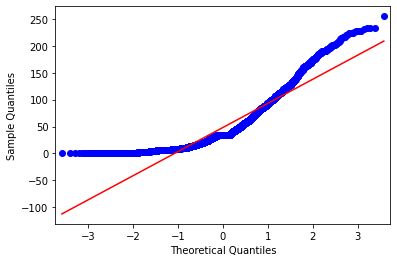

In [ ]:
#PRUEBA NORMALIDAD
#PLATEAMIENTO DE LA HIPOTESIS:
#Ho: Los datos están normalmente distribuidos
#Ha: Los datos no están normalmente distribuidos
#Nivel de significancia: 5% (0.05)

# Prueba normalidad: Antiguedad maxima

qqplot(df1['Antigüedad_Maxima'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(df1['Antigüedad_Maxima'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.959, p-value=0.000


Comentario: Se visualiza que Antiguedad_Maxima no se distribuye normalmente.

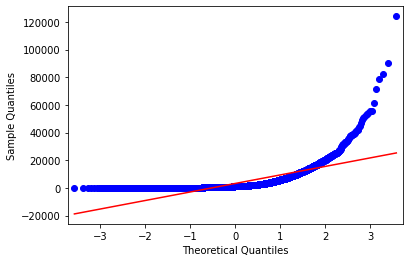

In [ ]:
# Prueba normalidad: Saldo_Pendiente

qqplot(df['Saldo_Pendiente'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(df1['Saldo_Pendiente'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.921, p-value=0.000


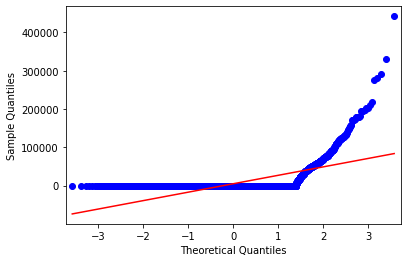

In [ ]:
# Prueba normalidad: Saldo_Pendiente_Seg

qqplot(df['Saldo_Pendiente_Seg'] , line='s')
plt.show()

In [ ]:
stat2, p2 = kstest(df1['Saldo_Pendiente_Seg'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.500, p-value=0.000


Comentario: Las variables númerica no llegan tener una distribución normal.

NOTA: Antes de la correlación debe ir una prueba de normalidad para ver si usamos la corr de person o la rho de spearman. Si tiene distribución normal: person - no: spearman. Person: relación causa efecto - Spearman: no relación.

In [ ]:
df1 = df1.drop(['Cliente_ID'], axis=1)

In [ ]:
numerical_features.corr(method='spearman')

,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg
Antigüedad_Maxima,1.000000,0.109996,0.127417
Saldo_Pendiente,0.109996,1.000000,0.148963
Saldo_Pendiente_Seg,0.127417,0.148963,1.000000


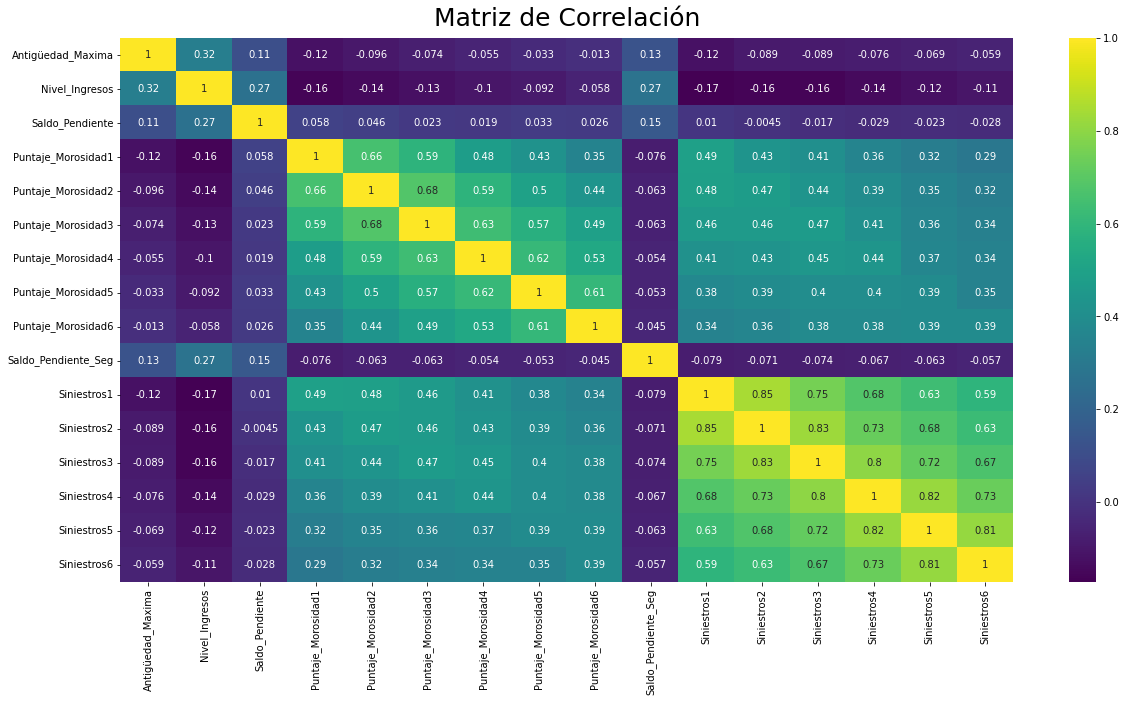

In [ ]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df1.corr(method='spearman'),cmap='viridis',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

In [ ]:
#CODIFICACION
df1['Estado_Siniestro_Cod'] = df1['Estado_Siniestro'].apply(lambda x: 1 if x=='si' else 0)
df1[['Estado_Siniestro', 'Estado_Siniestro_Cod']].head()

,Estado_Siniestro,Estado_Siniestro_Cod
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [ ]:
#CARACTERISTICAS Y ETIQUETAS
X = df1.drop(['Estado_Siniestro_Cod','Estado_Siniestro'], axis=1)
y = df1['Estado_Siniestro_Cod']

###*PREPACIÓN DEL MODELADO*

In [ ]:
#TECNICA BALANCEO
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5304, 1: 5304})


In [ ]:
#DATOS DE PRUEBA Y ENTRENAMIENTO
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=100)

In [ ]:
print("Datos originales: ", X.shape)
print("Datos para el entrenamiento: ",X_train.shape)
print("Datos para prueba",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Datos originales:  (5800, 16)
Datos para el entrenamiento:  (8486, 16)
Datos para prueba (2122, 16)
(8486,)
(2122,)


In [ ]:
#ESCALADO O NORMALIZACION DE LOS DATOS
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind

In [ ]:
x_train_scaled.shape

(8486, 16)

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(x_train_scaled, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())


Optimization terminated successfully.
         Current function value: 0.477611
         Iterations 7
                            Logit Regression Results                            
Dep. Variable:     Estado_Siniestro_Cod   No. Observations:                 8486
Model:                            Logit   Df Residuals:                     8469
Method:                             MLE   Df Model:                           16
Date:                  Mon, 06 Jun 2022   Pseudo R-squ.:                  0.3109
Time:                          01:28:50   Log-Likelihood:                -4053.0
converged:                         True   LL-Null:                       -5881.9
Covariance Type:              nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8718      0.036    -24.118      0.000      -0.943      -0.801
x1           

In [ ]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.predict(exog = X_train)

# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
# Accuracy de test del modelo 
# ==============================================================================
X_test = sm.add_constant(x_test_scaled, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 79.45334590009425%


In [ ]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,918,121
1,315,768


In [ ]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = y_test,
        y_pred = clasificacion
    )
)

              precision    recall  f1-score   support

           0       0.74      0.88      0.81      1039
           1       0.86      0.71      0.78      1083

    accuracy                           0.79      2122
   macro avg       0.80      0.80      0.79      2122
weighted avg       0.81      0.79      0.79      2122



Comentario: 

1.   De toda la cartera que el modelo predijo que seria siniestro, solo el 86% lo hizo correctamente.
2.   De toda la cartera que realmente es siniestro, el modelo solo predijo este resultado correctamente para el 71%


*Sugerencia: el random de la tecnica de balanceo, o poder regresar al EDA.*